In [1]:
library(poLCA)
suppressWarnings(library(tidyverse))
suppressWarnings(library(caret))
suppressWarnings(library(ggcorrplot))
suppressWarnings(library(GGally))
suppressWarnings(library(randomForest))
suppressWarnings(library(e1071))
suppressWarnings(library(ROCR))
suppressWarnings(library(pROC))
suppressWarnings(library(RCurl))
library(XML)
library(RCurl)
library(tidyLPA)

Loading required package: scatterplot3d

Loading required package: MASS

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Type 'citation("pROC")' for a citation.


A

# Download

Example code found here:

https://rpubs.com/raviolli77/352956



In [2]:
UCI_data_URL <- getURL('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
names <- c('id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst')
breast_cancer <- read.table(textConnection(UCI_data_URL), sep = ',', col.names = names)

breast_cancer$id_number <- NULL

In [3]:
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
names(breast_cancer)

[1] "diagnosis"               "radius_mean"            
 [3] "texture_mean"            "perimeter_mean"         
 [5] "area_mean"               "smoothness_mean"        
 [7] "compactness_mean"        "concavity_mean"         
 [9] "concave_points_mean"     "symmetry_mean"          
[11] "fractal_dimension_mean"  "radius_se"              
[13] "texture_se"              "perimeter_se"           
[15] "area_se"                 "smoothness_se"          
[17] "compactness_se"          "concavity_se"           
[19] "concave_points_se"       "symmetry_se"            
[21] "fractal_dimension_se"    "radius_worst"           
[23] "texture_worst"           "perimeter_worst"        
[25] "area_worst"              "smoothness_worst"       
[27] "compactness_worst"       "concavity_worst"        
[29] "concave_points_worst"    "symmetry_worst"         
[31] "fractal_dimension_worst"

Warning message:
“Using shapes for an ordinal variable is not advised”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


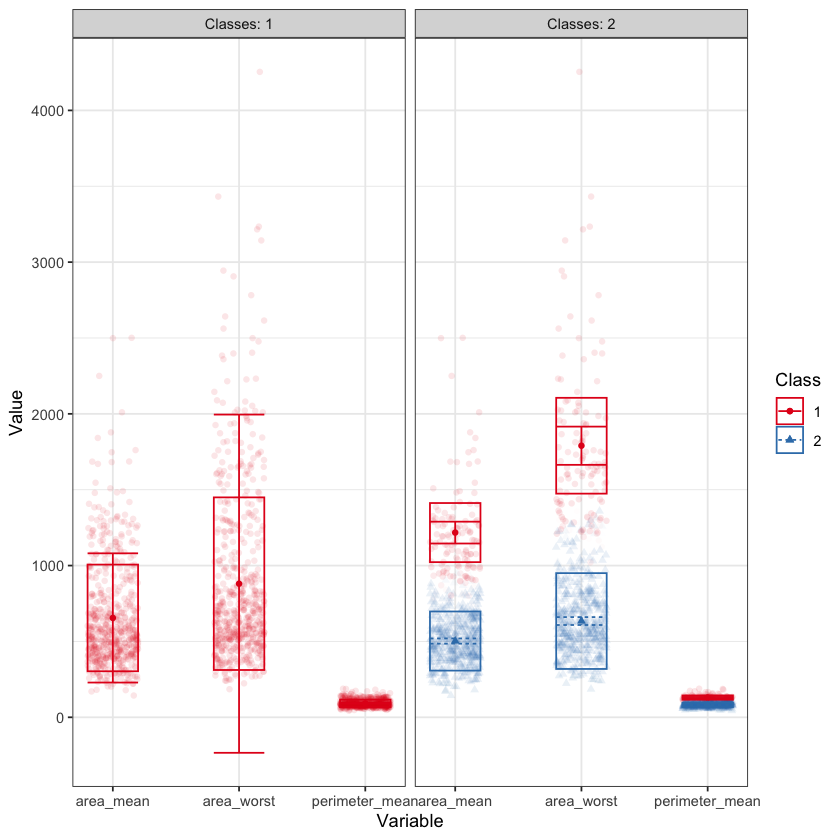

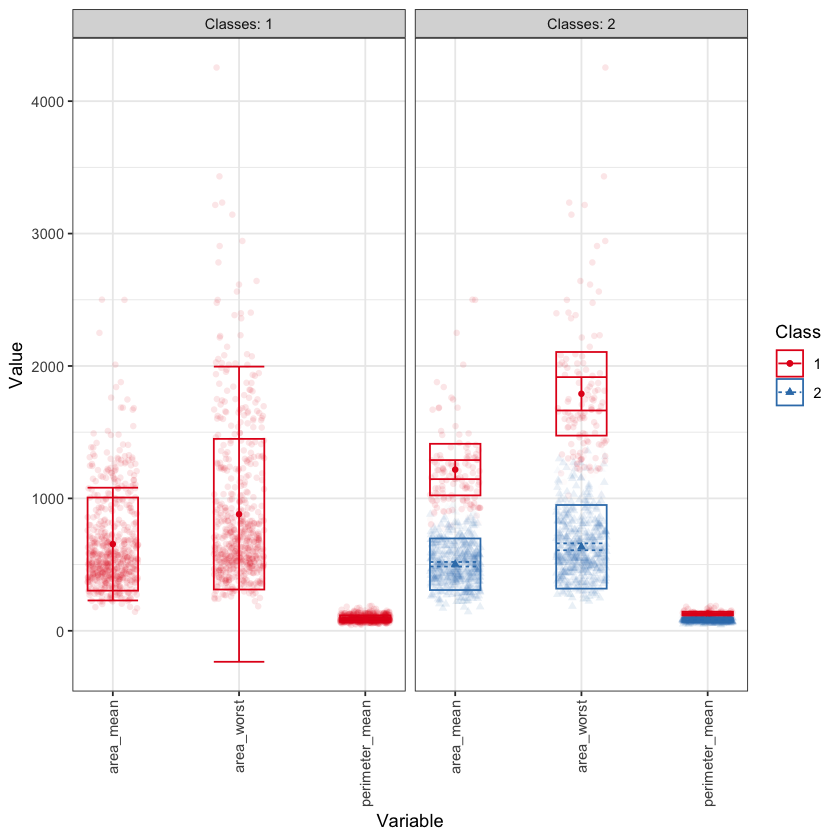

In [46]:
breast_cancer  %>%
  select(radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean,
         concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, 
         area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, 
         radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst,
         concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst) %>%
  #single_imputation() %>%
  subset(select = c("area_mean", "area_worst", "perimeter_mean")) %>%
  estimate_profiles(n_profiles = 1:2) %>%
  #estimate_profiles(n_profiles = 1:2, models = 1:2) %>%
  plot_profiles() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
  #plot_profiles()
  #estimate_profiles(3)

In [51]:
breast_cancer  %>%
  select(radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean,
         concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, 
         area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, 
         radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst,
         concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst) %>%
  estimate_profiles(1:6) %>%
  #get_fit() %>%
  compare_solutions()

Warning message:
“The solution with the maximum number of classes under consideration was considered to be the best solution according to one or more fit indices. Examine your results with care and consider estimating more classes.”


Model,Classes,LogLik,AIC,AWE,BIC,CAIC,CLC,KIC,SABIC,ICL,Entropy,prob_min,prob_max,n_min,n_max,BLRT_val,BLRT_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1599.190,3318.380,4137.645,3579.012,3639.012,3200.380,3381.380,3388.540,-3579.012,1.0000000,1.0000000,1.0000000,1.00000000,1.0000000,NA,NA
1,2,1834.530,-3487.061,-2243.442,-3091.768,-3000.768,-3667.094,-3393.061,-3380.651,3086.215,0.9836512,0.9936286,0.9967110,0.31458699,0.6854130,6867.4405,0.00990099
1,3,3102.011,-5960.021,-4292.075,-5430.068,-5308.068,-6202.061,-5835.021,-5817.362,5417.436,0.9801062,0.9595855,0.9969305,0.15641476,0.6432337,2534.9603,0.00990099
1,4,3833.281,-7360.562,-5268.290,-6695.948,-6542.948,-7664.607,-7204.562,-7181.653,6678.630,0.9776523,0.9639557,0.9931030,0.11072056,0.5413005,1462.5405,0.00990099
1,5,4296.637,-8225.274,-5708.651,-7426.000,-7242.000,-8591.348,-8038.274,-8010.116,7394.771,0.9626955,0.9503092,0.9999911,0.03514938,0.4024605,926.7120,0.00990099
1,6,4782.530,-9135.060,-6194.108,-8201.126,-7986.126,-9563.144,-8917.060,-8883.653,8162.451,0.9581697,0.9584312,0.9978279,0.02987698,0.3110721,971.7866,0.00990099


The 'variances'/'covariances' arguments were ignored in favor of the 'models' argument.

Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


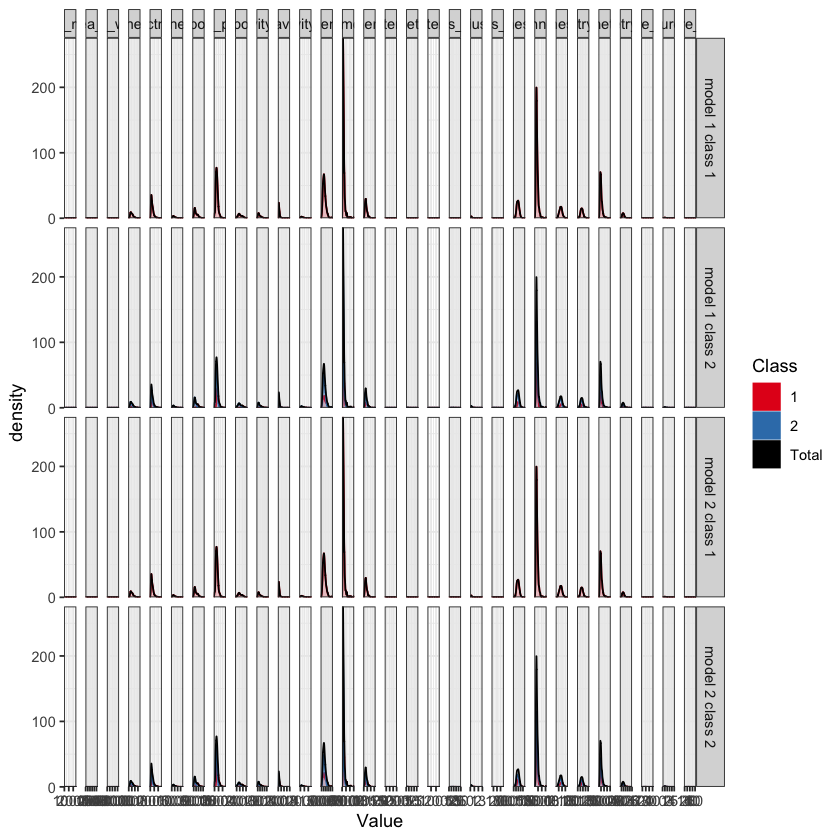

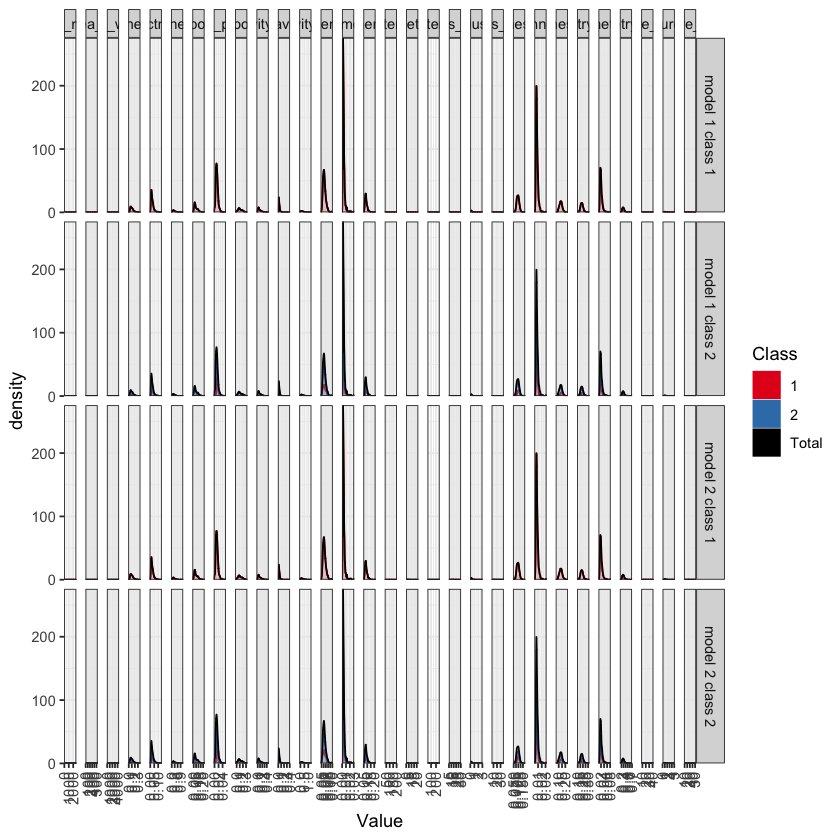

In [39]:
breast_cancer  %>%
  select(radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean,
         concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, 
         area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, 
         radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst,
         concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst) %>%
  #single_imputation() %>%
  estimate_profiles(n_profiles = 1:2, models = 1:2) %>%
  plot_density() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [52]:
results <- breast_cancer  %>%
  select(radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean,
         concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, 
         area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, 
         radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst,
         concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst) %>%
  #single_imputation() %>%
  poms() %>%
  estimate_profiles(2) %>%
  get_data(results)

In [53]:
head(results)

model_number,classes_number,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,⋯,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,CPROB1,CPROB2,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.5210374,0.0226581,0.5459885,0.3637328,0.5937528,0.7920373,0.7031396,0.7311133,⋯,0.45069799,0.6011358,0.6192916,0.5686102,0.9120275,0.5984624,0.4188640,1.0000000,1.040797e-46,1
1,2,0.6431445,0.2725736,0.6157833,0.5015907,0.2898799,0.1817680,0.2036082,0.3487575,⋯,0.43521431,0.3475533,0.1545634,0.1929712,0.6391753,0.2335896,0.2228781,1.0000000,2.850273e-12,1
1,2,0.6014956,0.3902604,0.5957432,0.4494168,0.5143089,0.4310165,0.4625117,0.6356859,⋯,0.37450845,0.4835898,0.3853751,0.3597444,0.8350515,0.4037059,0.2134330,1.0000000,4.576229e-29,1
1,2,0.2100904,0.3608387,0.2335015,0.1029056,0.8113208,0.8113613,0.5656045,0.5228628,⋯,0.09400806,0.9154725,0.8140117,0.5486422,0.8848797,1.0000000,0.7737111,1.0000000,2.257163e-24,1
1,2,0.6298926,0.1565776,0.6309861,0.4892895,0.4303512,0.3478928,0.4639175,0.5183897,⋯,0.34157491,0.4373638,0.1724151,0.3194888,0.5584192,0.1575005,0.1425948,1.0000000,1.256152e-19,1
1,2,0.2588386,0.2025702,0.2679842,0.1415058,0.6786133,0.4619962,0.3697282,0.4020378,⋯,0.13674794,0.7127386,0.4827837,0.4277157,0.5982818,0.4770353,0.4549390,0.9996964,3.035966e-04,1


In [24]:
install.packages(c("poLCA","tidyverse","XML","RCurl", "caret", "ggcorrplot", "GGally", "randomForest", "e1071",
                  "ROCR", "pROC", "tidyLPA"))

Installing packages into ‘/Users/kslote/Library/R/x86_64/4.1/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proto’, ‘gsubfn’, ‘texreg’, ‘pander’, ‘fastDummies’, ‘mclust’, ‘mix’, ‘MplusAutomation’





The downloaded binary packages are in
	/var/folders/tw/lyf2ngbd0vz_jgdvbr4lffkc0000gr/T//RtmpvHwAm0/downloaded_packages
